# Assignment No. 3 Part (d)

## Introduction

The scipy.fftpack module allows to compute Fast Fourier transforms which is essentially a part of the Fourier analysis, a method for expressing a function as a sum of periodic components, and for recovering the signal from those components. When both the function and its Fourier transform are replaced with discretized counterparts, it is called the discrete Fourier transform (DFT). The DFT has become a mainstay of numerical computing in the past because of a very fast algorithm for computing it, called the Fast Fourier Transform (FFT).

### Examples


The example plots the FFT of the sum of two sines.


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


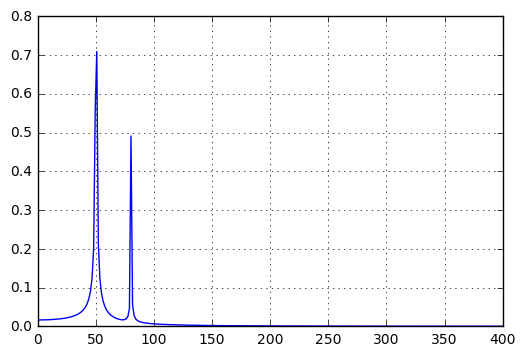

In [24]:
>>> import numpy as np
>>> from scipy.fftpack import fft
>>> # Number of sample points
>>> N = 600
>>> # sample spacing
>>> T = 1.0 / 800.0
>>> x = np.linspace(0.0, N*T, N)
>>> y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
>>> yf = fft(y)
>>> xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
>>> import matplotlib.pyplot as plt
>>> plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
>>> plt.grid()
>>> plt.show()


The FFT input signal is inherently truncated. This truncation can be modelled as multiplication of an infinite signal with a rectangular window function. In the spectral domain this multiplication becomes convolution of the signal spectrum with the window function spectrum, being of form sin(x)/x
. This convolution is the cause of an effect called spectral leakage (see [WPW]). Windowing the signal with a dedicated window function helps mitigate spectral leakage. The example below uses a Blackman window from scipy.signal and shows the effect of windowing (the zero component of the FFT has been truncated for illustrative purposes).


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


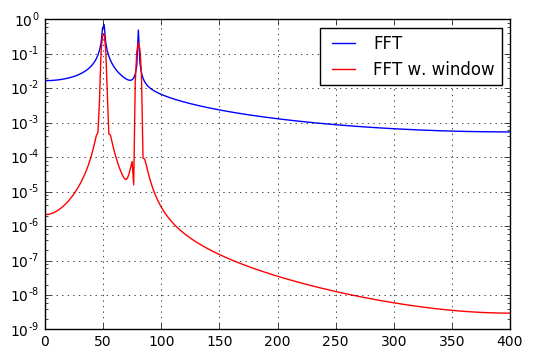

In [25]:
>>>
>>> from scipy.fftpack import fft
>>> # Number of sample points
>>> N = 600
>>> # sample spacing
>>> T = 1.0 / 800.0
>>> x = np.linspace(0.0, N*T, N)
>>> y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
>>> yf = fft(y)
>>> from scipy.signal import blackman
>>> w = blackman(N)
>>> ywf = fft(y*w)
>>> xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
>>> import matplotlib.pyplot as plt
>>> plt.semilogy(xf[1:N/2], 2.0/N * np.abs(yf[1:N/2]), '-b')
>>> plt.semilogy(xf[1:N/2], 2.0/N * np.abs(ywf[1:N/2]), '-r')
>>> plt.legend(['FFT', 'FFT w. window'])
>>> plt.grid()
>>> plt.show()


In case the sequence x is complex-valued, the spectrum is no longer symmetric. To simplify working wit the FFT functions, scipy provides the following two helper functions.
The function fftfreq returns the FFT sample frequency points.


In [26]:
>>> 
>>> from scipy.fftpack import fftfreq
>>> freq = fftfreq(8, 0.125)
>>> freq



array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

In a similar spirit, the function fftshift allows swapping the lower and upper halves of a vector, so that it becomes suitable for display.

In [27]:
>>>
>>> from scipy.fftpack import fftshift
>>> x = np.arange(8)
>>> fftshift(x)


array([4, 5, 6, 7, 0, 1, 2, 3])

The example below plots the FFT of two complex exponentials; note the asymmetric spectrum.

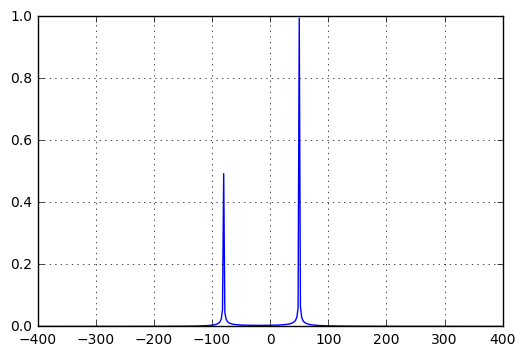

In [28]:
>>>
>>> from scipy.fftpack import fft, fftfreq, fftshift
>>> # number of signal points
>>> N = 400
>>> # sample spacing
>>> T = 1.0 / 800.0
>>> x = np.linspace(0.0, N*T, N)
>>> y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
>>> yf = fft(y)
>>> xf = fftfreq(N, T)
>>> xf = fftshift(xf)
>>> yplot = fftshift(yf)
>>> import matplotlib.pyplot as plt
>>> plt.plot(xf, 1.0/N * np.abs(yplot))
>>> plt.grid()
>>> plt.show()


The scipy.fftpack module allows to compute fast Fourier transforms. As an illustration, a (noisy) input signal may look like:

In [29]:
>>>
>>> time_step = 0.02
>>> period = 5.
>>> time_vec = np.arange(0, 20, time_step)
>>> sig = np.sin(2 * np.pi / period * time_vec) + \
...       0.5 * np.random.randn(time_vec.size)


The observer doesn’t know the signal frequency, only the sampling time step of the signal sig. The signal is supposed to come from a real function so the Fourier transform will be symmetric. The scipy.fftpack.fftfreq() function will generate the sampling frequencies and scipy.fftpack.fft() will compute the fast Fourier transform:

In [30]:
>>>
>>> from scipy import fftpack
>>> sample_freq = fftpack.fftfreq(sig.size, d=time_step)
>>> sig_fft = fftpack.fft(sig)


Because the resulting power is symmetric, only the positive part of the spectrum needs to be used for finding the frequency:

In [31]:
>>>
>>> pidxs = np.where(sample_freq > 0)
>>> freqs = sample_freq[pidxs]
>>> power = np.abs(sig_fft)[pidxs]


The signal frequency can be found by:

In [32]:
>>>
>>> freq = freqs[power.argmax()]
>>> np.allclose(freq, 1./period)  # check that correct freq is found


True

Now the high-frequency noise will be removed from the Fourier transformed signal:

In [33]:
>>>
>>> sig_fft[np.abs(sample_freq) > freq] = 0



The resulting filtered signal can be computed by the scipy.fftpack.ifft() function:


In [34]:
>>>
>>> main_sig = fftpack.ifft(sig_fft)


The result can be viewed with:

In [24]:
>>> %matplotlib
>>> import scipy.fftpack as fftpack
>>> import numpy as np
>>> import pylab as plt
>>> from scipy import fftpack
>>> sample_freq = fftpack.fftfreq(sig.size, d=time_step)
>>> sig_fft = fftpack.fft(sig)
>>> pidxs = np.where(sample_freq > 0)
>>> freqs = sample_freq[pidxs]
>>> power = np.abs(sig_fft)[pidxs]
>>> freq = freqs[power.argmax()]
>>> plt.figure()
>>> time_step = 0.02
>>> period = 5.
>>> time_vec = np.arange(0, 20, time_step)
>>> sig = np.sin(2 * np.pi / period * time_vec) + \
...       0.5 * np.random.randn(time_vec.size)
>>> plt.plot(time_vec, sig)
>>> sig_fft[np.abs(sample_freq) > freq] = 0
>>> main_sig = fftpack.ifft(sig_fft)
>>> plt.plot(time_vec, main_sig, linewidth=3)    
>>> plt.xlabel('Time [s]')    
>>> plt.ylabel('Amplitude')    
>>> plt.show()
  



Using matplotlib backend: Qt5Agg


C:\Users\ADMIN\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
